In [8]:
%%time

import os

# import matplotlib.pyplot as plt
import numpy as np
# import seaborn as sns  # Import seaborn for better violin plots
from cltk.tokenize.word import WordTokenizer

# Define the directory containing your text files
directory = "../../corpora/corpus_imposters/"

# Initialize the CLTK Latin tokenizer
tokenizer = WordTokenizer("latin")

# Initialize a list to store token lengths
text_lengths = list()
filenames = list()


# Loop through each text file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory, filename)
        with open(file_path, "r", encoding="utf-8") as file:
            text = file.read()
            tokens = tokenizer.tokenize(text)
            text_length = len(tokens)
            text_lengths.append(text_length)
            filenames.append((filename, text_length))  # Store filename and text length

ModuleNotFoundError: No module named 'cltk.tokenize'

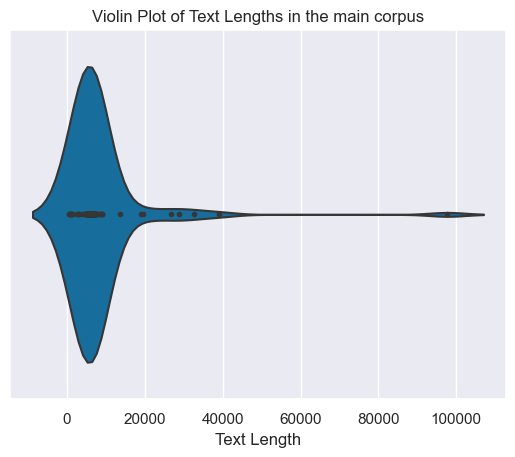

In [74]:
sns.set_palette("colorblind")

# violin plot of token lengths that is filled with inner points
sns.violinplot(x=text_lengths, fill=False, inner="point")
plt.xlabel("Text Length")
plt.title("Violin Plot of Text Lengths in the main corpus")
# Show the plot
plt.show()

In [120]:
# Sort filenames and their corresponding text lengths in ascending order based on length
sorted_files = sorted(zip(filenames, text_lengths), key=lambda x: x[1])

# Unzip the sorted pairs to separate filenames and lengths
sorted_filenames, sorted_lengths = zip(*sorted_files)


# print the 5 first shortest texts
for filename, text_length in sorted_filenames[:5]:
    filename = os.path.splitext(filename)[0].replace("_", " ").title()
    print(filename, ":\t", text_length, "tokens", "\n")

print("\n")
# print the 5 longest texts
for filename, text_length in sorted_filenames[-5::]:
    filename = os.path.splitext(filename)[0].replace("_", " ").title()
    print(filename, ":\t", text_length, "tokens", "\n")

Persius Sati 4 :	 424 tokens 

Persius Sati 2 :	 644 tokens 

Persius Sati 6 :	 711 tokens 

Ovid Medicam :	 747 tokens 

Persius Sati 3 :	 1069 tokens 



Ovid Ponto :	 26661 tokens 

Ovid Tristia :	 28693 tokens 

Ovid Epist :	 32529 tokens 

Ovid Fasti :	 39064 tokens 

Ovid Meta :	 97721 tokens 



Given the distribution of the length of the texts in the main corpus, there are some texts that behave as outliers. For example, on the violinplot someone can clearly see that Ovid's text, *Metamorphoses*, has almost 98k words, a size that creates a huge distance from the rest of the texts. On the other hand, some of Persius' Satires (specifically *Satire* 2, 4, and 6) have 644, 424, 711 tokens respectively, therefore they can also be removed from the dataset in order to create more stable examples.

(the idea behind the removal of the texts in order to create a more stable corpus to compare with the disputed texts come from Cafiero and Camps' paper (2019), *Why Molière most likely did write his plays*, Science Advances).